In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# split the data into train and test data sets
x_train, x_test, y_train, y_test = tts(data.data, data.target)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [23]:
try:
    del scaled_model
except:
    pass
scaled_model = StandardScaler()
x_train_scaled = scaled_model.fit_transform(x_train)
x_test_scaled = scaled_model.transform(x_test)

In [38]:
try:
    del model
except:
    pass
# getting the model up and running
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(x_train_scaled.shape[1],), activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

result = model.fit(x_train_scaled,y_train, validation_data=(x_test_scaled,y_test), epochs=100, verbose=False)

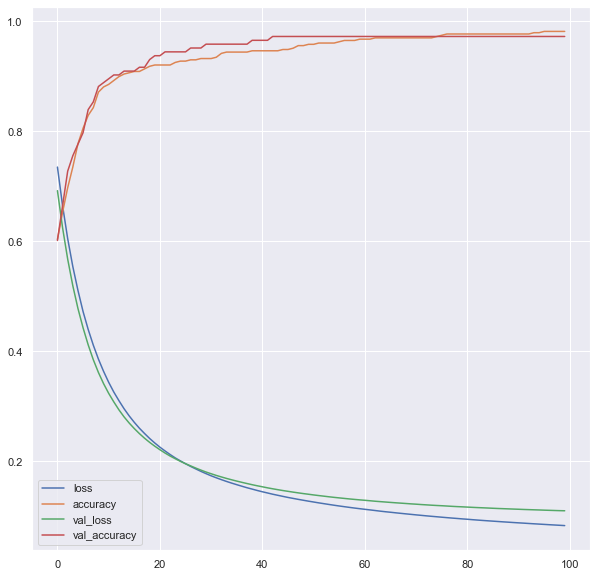

In [39]:
plt.figure(figsize=(10,10))
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_loss'], label='val_loss')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [40]:
# Gives us the weights for each feature
model.get_weights()

[array([[-0.067141  ],
        [-0.37900788],
        [-0.02385508],
        [-0.15534241],
        [-0.24606104],
        [-0.42546788],
        [-0.52241546],
        [-0.04135624],
        [-0.39327708],
        [ 0.61818266],
        [-0.29075286],
        [ 0.10406767],
        [-0.568835  ],
        [-0.7858603 ],
        [-0.21201257],
        [ 0.09831146],
        [ 0.1069095 ],
        [ 0.06000087],
        [ 0.10525753],
        [ 0.5683548 ],
        [-0.7114973 ],
        [-0.45058772],
        [-0.84083414],
        [-0.8807512 ],
        [-0.23547195],
        [-0.44900995],
        [-0.54059047],
        [-0.11770357],
        [-0.11472207],
        [-0.33025435]], dtype=float32),
 array([0.42758152], dtype=float32)]

In [52]:
y_pred = model.predict(x_test).flatten()

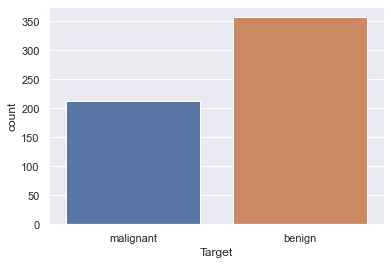

In [42]:
sns.countplot(x= data.target);
plt.xlabel('Target');
plt.xticks([0,1],list(data.target_names));

In [43]:
model.evaluate(x_test_scaled, y_test)

5/5 [==============================] - 0s 699us/step - loss: 0.1102 - accuracy: 0.9720


[0.11017144471406937, 0.9720279574394226]

In [31]:
#print(y_pred)

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
